<a href="https://colab.research.google.com/github/vaishnavi27-0/plant-disease-detection-project/blob/main/Copy_of_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kagle_API/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/kagle_API/kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:05<00:00, 23.5MB/s]
100% 2.70G/2.70G [02:05<00:00, 23.1MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files
import zipfile


In [ ]:
# Set up train and validation directories (adjust paths if needed)
train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
# Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)

# Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
# Model Building - CNN
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1500, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # To avoid overfitting
    tf.keras.layers.Dense(units=38, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
training_history = cnn.fit(training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 170s 70ms/step - accuracy: 0.4031 - loss: 2.1352 - val_accuracy: 0.8390 - val_loss: 0.5138
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 183s 67ms/step - accuracy: 0.8370 - loss: 0.5126 - val_accuracy: 0.9236 - val_loss: 0.2403
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9058 - loss: 0.2911 - val_accuracy: 0.9348 - val_loss: 0.1921
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 60ms/step - accuracy: 0.9355 - loss: 0.2017 - val_accuracy: 0.9469 - val_loss: 0.1801
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 61ms/step - accuracy: 0.9531 - loss: 0.1462 - val_accuracy: 0.9586 - val_loss: 0.1293
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.9644 - loss: 0.1100 - val_accuracy: 0.9606 - val_loss: 0.1248
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.9683 - loss: 0.0958 - val_accuracy: 0.9607 - val_loss: 0.1260
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 

In [ ]:
# Training accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

# Validation accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 58s 27ms/step - accuracy: 0.9840 - loss: 0.0494
Training accuracy: 0.985333263874054
550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9547 - loss: 0.1568
Validation accuracy: 0.957659900188446


In [ ]:
# Visualizing Training History
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.title('Accuracy Visualization')
plt.legend()
plt.show()


In [ ]:
# Confusion Matrix & Classification Report
# Set test set for prediction
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
# Predict with the model
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


In [ ]:
# Get true categories
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)
print("Classification Report:\n", classification_report(Y_true, predicted_categories))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       504
           1       0.98      0.99      0.98       497
           2       0.98      0.95      0.97       440
           3       0.94      0.96      0.95       502
           4       0.94      0.98      0.96       454
           5       0.99      0.94      0.96       421
           6       0.98      0.98      0.98       456
           7       0.94      0.91      0.92       410
           8       0.98      1.00      0.99       477
           9       0.94      0.97      0.95       477
          10       1.00      1.00      1.00       465
          11       1.00      0.95      0.97       472
          12       0.95      1.00      0.97       480
          13       1.00      1.00      1.00       430
          14       1.00      0.98      0.99       423
          15       0.93      0.99      0.96       503
          16       0.97      0.95      0.96       459
   

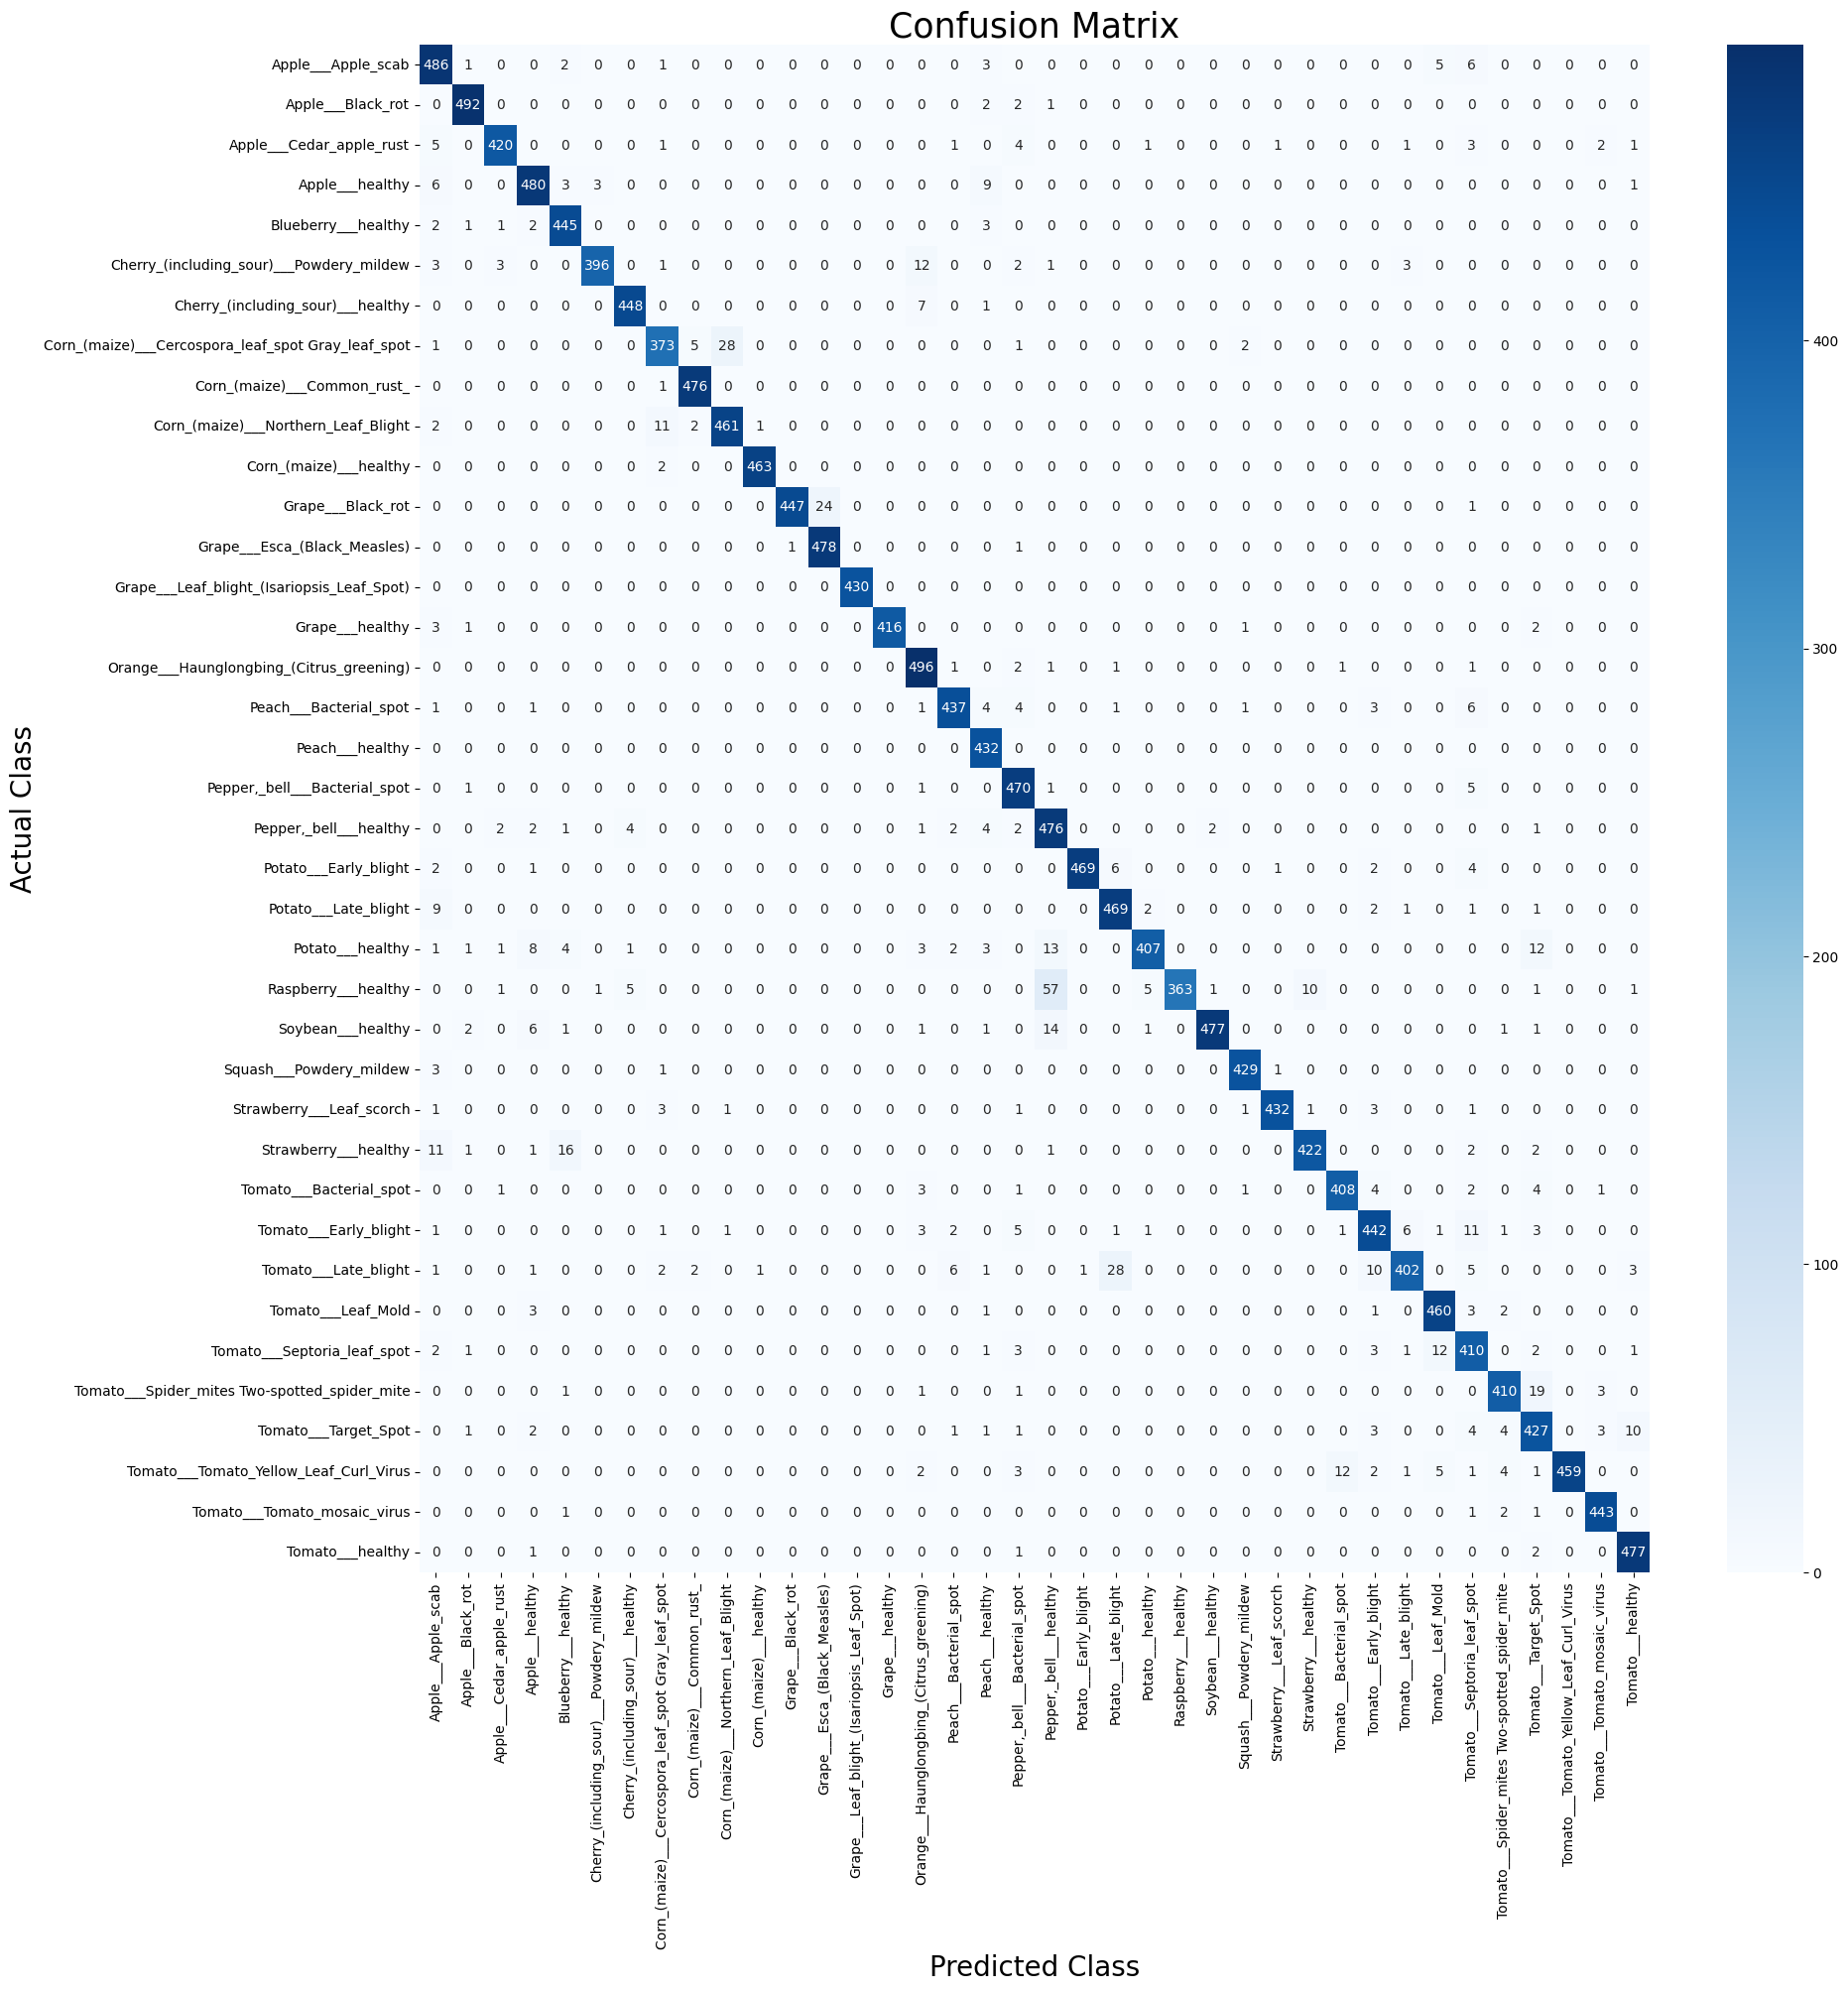

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(20, 20))  # Adjust the figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 10}, cmap='Blues', xticklabels=test_set.class_names, yticklabels=test_set.class_names)
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

In [ ]:
cnn.save('trained_plant_disease_model.keras')

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow import keras

In [ ]:
# Step 2: Mount Google Drive (If your dataset is stored on Google Drive)
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 3: Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Get the class names
class_name = validation_set.class_names
print(class_name)


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_plant_disease_model.keras')

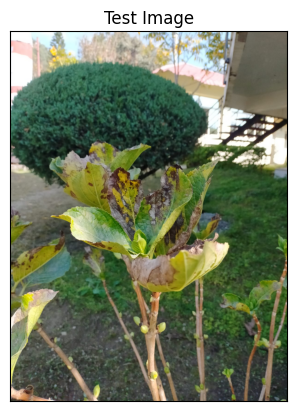

In [ ]:
# Step 5: Visualizing and performing prediction on a single image


image_path = '/content/drive/MyDrive/clgplant1'  # Update this path

# Test Image Visualization
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Step 6: Preprocess the image for model prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
# Step 7: Print the predictions and find the result index
print(predictions)

result_index = np.argmax(predictions)  # Return index of the max element
print(result_index)


[[1.3388554e-10 3.9924832e-13 1.5576388e-13 6.6807210e-13 1.1662599e-16
  2.0141820e-13 7.7005222e-15 5.0619760e-06 1.1018673e-06 2.9297318e-11
  9.2092794e-13 4.2559048e-10 2.5612534e-10 1.2543196e-10 8.9923777e-17
  7.0240966e-14 1.7077971e-10 1.5836234e-13 1.5153883e-08 1.1751876e-12
  3.2293133e-11 9.7434725e-15 1.9671155e-12 8.5654825e-16 2.8681036e-16
  1.2783015e-12 1.6836827e-09 1.8624762e-17 4.9648369e-11 9.9999392e-01
  4.5491357e-09 6.7931828e-12 1.6232496e-11 7.3797116e-16 1.3045570e-14
  1.9725575e-14 3.9021623e-17 2.0057456e-15]]
29


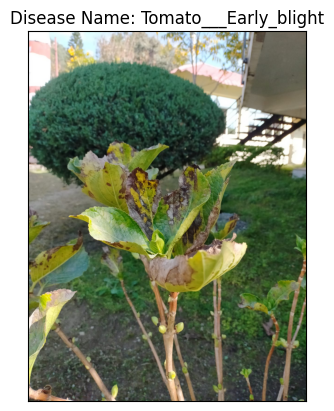

In [ ]:
# Step 8: Display the predicted class (disease name)
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_plant_disease_model.keras')  # Update the path if necessary

# Get class names from validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=1,
    shuffle=False
)
class_names = validation_set.class_names

def classify_plant_disease(image):
    """
    Function to classify the plant disease from the uploaded image.
    Args:
        image (PIL.Image or numpy array): The input image.
    Returns:
        (str, dict): Predicted disease name and class probabilities.
    """
    # Preprocess image
    image = image.resize((128, 128))
    input_arr = img_to_array(image)
    input_arr = np.array([input_arr])  # Batch dimension

    # Predict
    predictions = model.predict(input_arr)
    result_index = np.argmax(predictions)
    predicted_class = class_names[result_index]

    # Prepare probabilities for all classes
    probabilities = {class_names[i]: float(predictions[0][i]) for i in range(len(class_names))}

    return predicted_class, probabilities

# Create Gradio Interface
interface = gr.Interface(
    fn=classify_plant_disease,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=1, label="Predicted Disease"),
        gr.JSON(label="Class Probabilities")
    ],
    title="Plant Disease Classifier",
    description="Upload an image of a plant leaf to classify the disease.",
    allow_flagging="never"
)

# Launch the GUI
interface.launch(debug=True)


Found 17572 files belonging to 38 classes.


/usr/local/lib/python3.10/dist-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1019e225b6a69ceb5e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
